In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [3]:
data = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
data.sample(5)

,Unnamed: 0,YearsExperience,Salary
18,18,6.0,81364.0
21,21,7.2,98274.0
8,8,3.3,64446.0
4,4,2.3,39892.0
19,19,6.1,93941.0


In [5]:
data.shape # check how many rows and columns in the dataset

(30, 3)

In [6]:
# Drop unecessary column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.head(3) 

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


In [8]:
data.isnull().sum() # Check null values are present or not

YearsExperience    0
Salary             0
dtype: int64

In [9]:
data.duplicated().sum() # Check for duplicates

0

# **The .info() method helps you quickly check the structure of a DataFrame, including missing values and the type of data you're dealing with.**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
data.describe(include='all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [12]:
data['YearsExperience'].value_counts()

YearsExperience
3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: count, dtype: int64

# Checking for unique values to decide if we need to drop any column

In [13]:
data.nunique()

YearsExperience    28
Salary             30
dtype: int64

# Visualizing the dataset properly¶


In [14]:
import plotly.express as px

fig = px.scatter(data_frame=data, x="YearsExperience", y="Salary", 
                 size="YearsExperience", trendline='ols')
fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='YearsExperience', ylabel='Count'>

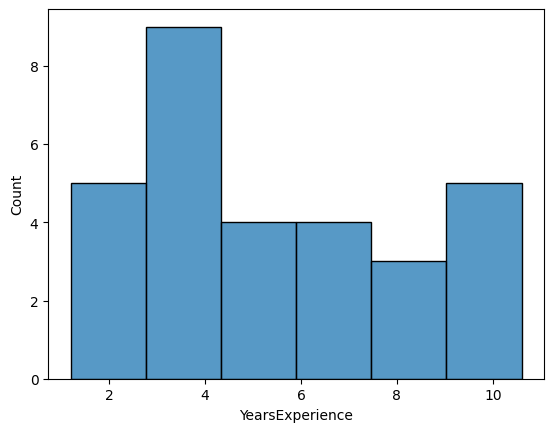

In [15]:
sns.histplot(data= data, x ='YearsExperience')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Salary', ylabel='Count'>

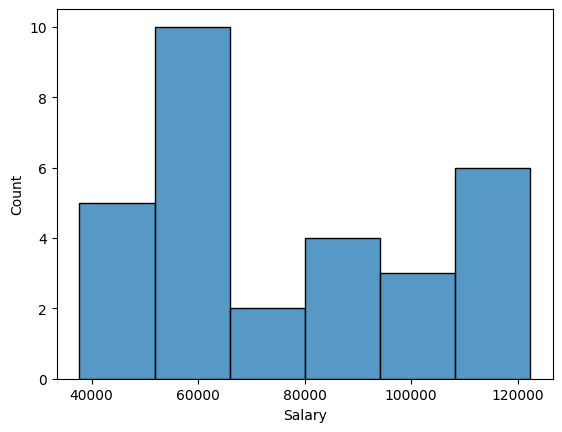

In [16]:
sns.histplot(data= data, x= 'Salary')

<Axes: >

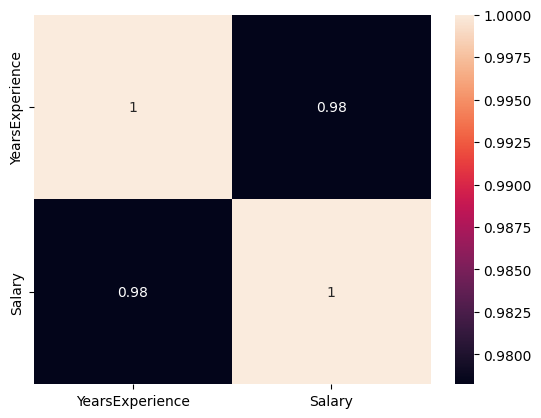

In [17]:
sns.heatmap(data.corr(),annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



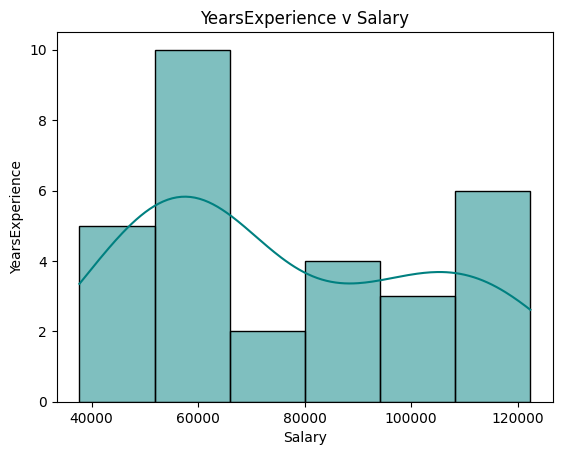

In [18]:
sns.histplot(data['Salary'], kde=True, color='teal')
plt.title('YearsExperience v Salary')
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

Text(0, 0.5, 'Salary')

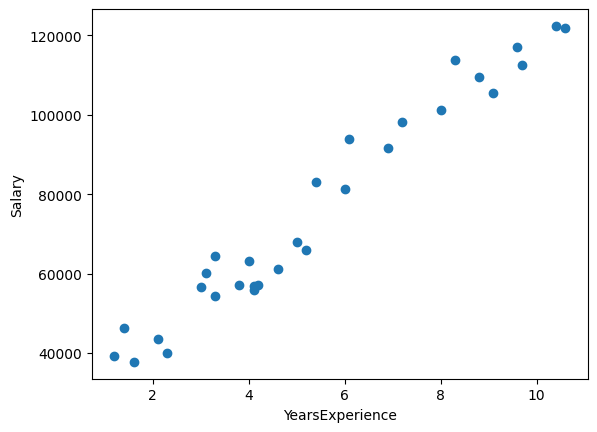

In [19]:

plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

# Extracting features and target variable from the dataframe 'data'¶


In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
type(X)

pandas.core.frame.DataFrame

# splitting the data into train and test data¶


In [22]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Making predictions on Train and Test data¶


In [24]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

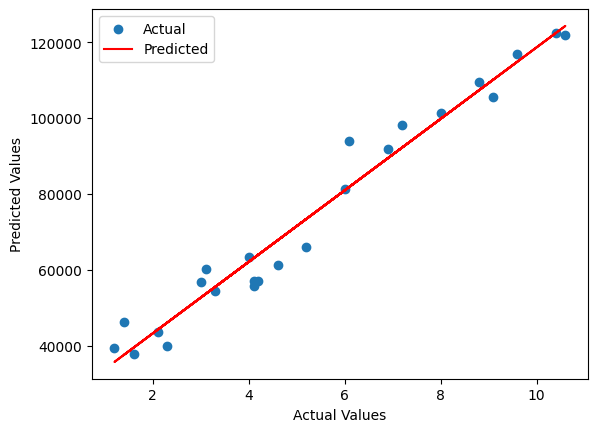

In [25]:
plt.scatter(X_train,y_train, label='Actual')
plt.plot(X_train,lr.predict(X_train),color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Determining the metrics for Linear Regression¶


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

train_rme= mean_squared_error(y_train, y_train_pred)
test_rme= mean_squared_error(y_test, y_test_pred)
train_r2= r2_score(y_train, y_train_pred)
test_r2= r2_score(y_test, y_test_pred)

print(f"train_rme: {train_rme}\n"
      f"test_rme: {test_rme}\n"
      f"train_r2: {train_r2}\n"
      f"test_r2: {test_r2}")

train_rme: 27102249.73126133
test_rme: 49830096.855908394
train_r2: 0.9645401573418148
test_r2: 0.9024461774180497


# Create DataFrames for training and testing datasets¶


In [27]:
train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), 'Dataset': 'Training'})
test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), 'Dataset': 'Testing'})

# Concatenate both DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

/tmp/ipykernel_17/1761490315.py:1: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.

/tmp/ipykernel_17/1761490315.py:2: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



# Plot the results using Seaborn¶


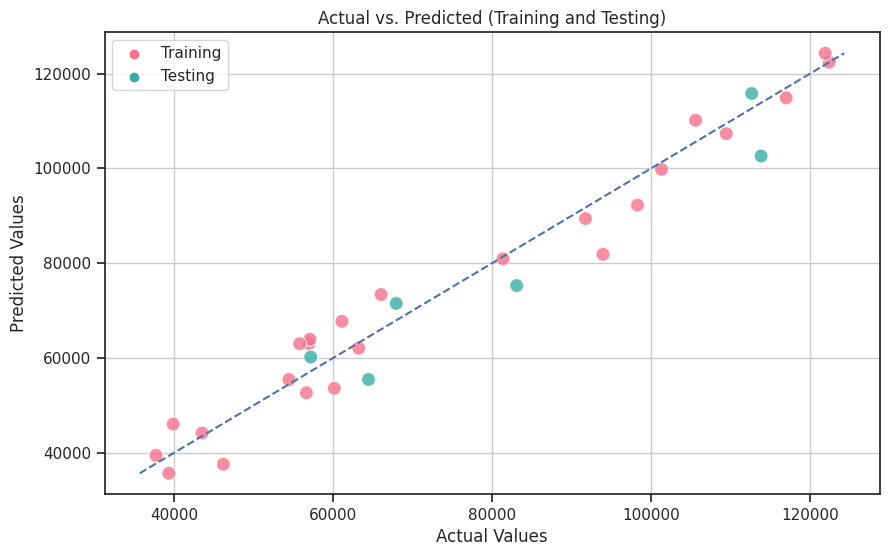

In [28]:
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8, palette='husl') 

plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 
    'b--' 
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')

plt.legend()
plt.grid(True)
plt.show()